# 线性判别分析(LDA)  P60

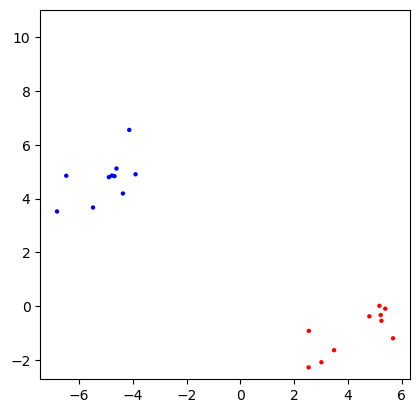

In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
m = 10  # 样本数
# 第一组数据
mean_1 = (-5, 5)
cov_1 = [[1, 0.7], [0.7, 1]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, m).T
# 第二组数据
mean_2 = (4, -1)
cov_2 = [[1, 0.7], [0.7, 1]]
X_2 = np.random.multivariate_normal(mean_2, cov_2, m).T

# 显示数据
plt.scatter(X_1[0,:], X_1[1,:], c='b', s=10, edgecolor='none')
plt.scatter(X_2[0,:], X_2[1,:], c='r', s=10, edgecolor='none')
plt.axis('square')
plt.show()

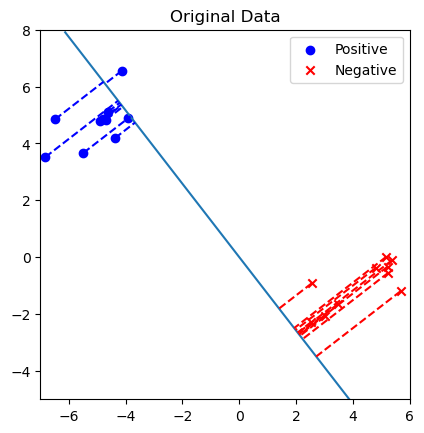

In [49]:
w = np.random.random((2,1))
Xmean_1 = np.mean(X_1, axis=1)[:, np.newaxis]
Xmean_2 = np.mean(X_2, axis=1)[:, np.newaxis]
Xcov_1 = (X_1 - Xmean_1) @ (X_1 - Xmean_1).T
Xcov_2 = (X_2 - Xmean_2) @ (X_2 - Xmean_2).T  # 协方差矩阵
Sw = Xcov_1 + Xcov_2  # 类内散度矩阵
U,S,V = np.linalg.svd(Sw)
Sw_inv = V @ np.diag(1 / S) @ U.T
w = Sw_inv @ (Xmean_1 - Xmean_2)
w = w / np.linalg.norm(w)

# y = w.T * x  表示样本点在w直线上的投影，w直线过原点
plt.scatter(X_1[0,:], X_1[1,:], color='blue', marker='o', label='Positive')
plt.scatter(X_2[0,:], X_2[1,:], color='red', marker='x', label='Negative')
plt.axis('square')
plt.legend(loc='upper right')
plt.title('Original Data')
plt.plot([-w[0]*7,w[0]*10], [-w[1]*7, w[1]*10])

for i in range(m):
    proj_x1 = w.T @ X_1[:,i] * w
    proj_x2 = w.T @ X_2[:,i] * w  # 投影点
    plt.plot([X_1[:,i][0],proj_x1[0]],[X_1[:,i][1],proj_x1[1]], c='b', linestyle="--")
    plt.plot([X_2[:,i][0],proj_x2[0]],[X_2[:,i][1],proj_x2[1]], c='r', linestyle="--")

plt.axis([-7, 6, -5, 8])
plt.show()